# A Forest of Mushrooms - Final Project Group 3
## Jared Barber
## Arunabh Bhattacharya

### Introduction
Mushrooms are one of the most overlooked, but also one of the most important parts of a wildlife ecosystem. They are found on every continent, including Antarctica, and over 10 thousand species are currently recognized worldwide. Some are poisonous, others are used as: food; have medicinal properties; or even possess spiritual significance in some religious traditions. Recreational mushroom hunitng, or foraging has also seen an increase in popularity in recent years. Unfortunately, there are no simple rules for determining the ediblity of a mushroom. Famously, many edible mushrooms have toxic look-alikes that can cause sickness or death when eaten.

### Problem Statement
Our goal for this project is to build a Random Forest Classification model to determine whether a mushroom is safe to eat or not. We propose to study this problem by first building a function to implement the random forest algorithm from scratch, then comparing the model’s performance and output to the existing Random Forest Classifier provided in sklearn. Our end result will discover which features are most indicative of a poisonous mushroom.

Now, let's import some packages we will need to construct our model.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import metrics
from sklearn.metrics import classification_report

from matplotlib.colors import ListedColormap
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

### Data and Characteristics
The dataset we are using comes from the UCI Machine Learning repository available here (https://archive.ics.uci.edu/ml/datasets/mushroom). The data describes samples of mushrooms in the Agaricus and Lepiota families and identifies each sample as “definitely edible”, “definitely poisonous”, or “unknown” (and not recommended). 23 physical characteristics including cap shape, odor, and gill attachment are recorded for each sample and shown in the table below. These are called indicators and are the data points that can be used to make predictions. The column labelled ‘class’ is the target variable – whether a mushroom is poisonous or not. This piece of information is what we want our model to predict.

The rows in the table are referred to as atoms. Each atom contains data points related to a single entity. In our analysis, this is a single mushroom from an unknown species.

In [2]:
data= pd.read_csv("mushrooms.csv") 
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


If we want more information about the data, we can show that too.

In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


There are 8214 samples in this dataset

In [4]:
data['class'].count()

8124

Unfortunately, many of the attributes in the dataset that we may be interested in are represented by single characters. Although that is not a problem for classification, it is not very human-readable. A good way to represent this information is with a graph. \
Let's start by looking at the habitats of the different mushrooms. Although it is a rough approximation, it is interesting that there are more poisonous mushrooms in areas with fewer edible mushrooms. Haitat may be an important feature in our classification.

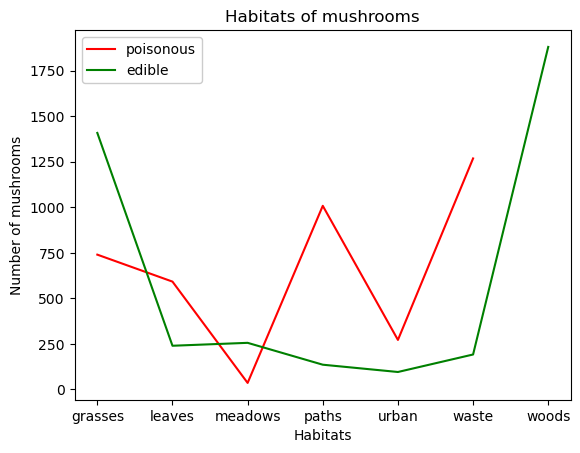

In [5]:
# Plot for habitats 
mushroom = data
mushroom.loc[mushroom['habitat'] == 'd', 'habitat'] = 'woods'
mushroom.loc[mushroom['habitat'] == 'g', 'habitat'] = 'grasses'
mushroom.loc[mushroom['habitat'] == 'l', 'habitat'] = 'leaves'
mushroom.loc[mushroom['habitat'] == 'm', 'habitat'] = 'meadows'
mushroom.loc[mushroom['habitat'] == 'p', 'habitat'] = 'paths'
mushroom.loc[mushroom['habitat'] == 'u', 'habitat'] = 'urban'
mushroom.loc[mushroom['habitat'] == 'w', 'habitat'] = 'waste'
p = mushroom[mushroom['class'] == 'p']
e = mushroom[mushroom['class'] == 'e']

ax1 = p.groupby('habitat').size().plot(color = 'r', label = 'poisonous')
ax2 = e.groupby('habitat').size().plot(color = 'g', label = 'edible')
ax1.set_ylabel("Number of mushrooms")
ax2.set_xlabel("Habitats")
ax1.set_title("Habitats of mushrooms")
ax1.legend(loc=0,framealpha=1)

Next, let's look at cap shapes. Again, it is interesting to note that poisonous and edible mushrooms tend to have different shaped caps.

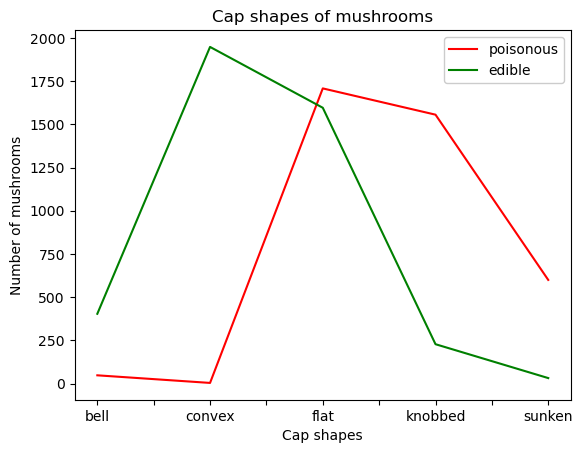

In [6]:
# Plot for cap shapes
mushroom.loc[mushroom['cap-shape'] == 'b', 'cap-shape'] = 'bell'
mushroom.loc[mushroom['cap-shape'] == 'c', 'cap-shape'] = 'conical'
mushroom.loc[mushroom['cap-shape'] == 'x', 'cap-shape'] = 'convex'
mushroom.loc[mushroom['cap-shape'] == 'f', 'cap-shape'] = 'flat'
mushroom.loc[mushroom['cap-shape'] == 'k', 'cap-shape'] = 'knobbed'
mushroom.loc[mushroom['cap-shape'] == 's', 'cap-shape'] = 'sunken'
p = mushroom[mushroom['class'] == 'p']
e = mushroom[mushroom['class'] == 'e']

ax1 = p.groupby('cap-shape').size().plot(color = 'r', label = 'poisonous')
ax2 = e.groupby('cap-shape').size().plot(color = 'g', label = 'edible')
ax1.set_ylabel("Number of mushrooms")
ax1.set_xlabel("Cap shapes")
ax1.set_title("Cap shapes of mushrooms")
ax1.legend(loc=0,framealpha=1)

Cap colors seem to be fairly consistent between poisonous and edible mushrooms.The only outstanding piece of information we can derive from this graph is that a mushroom with a pink cap appears much more likely to be poisonous. Cap color will probably not be an important attribute in classification.

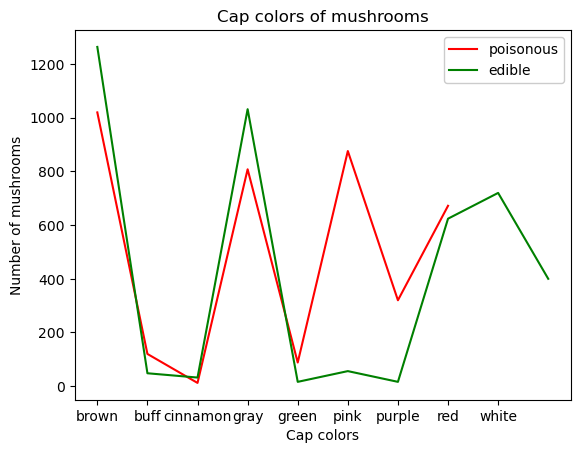

In [7]:
# Plot for cap colors
mushroom.loc[mushroom['cap-color'] == 'n', 'cap-color'] = 'brown'
mushroom.loc[mushroom['cap-color'] == 'b', 'cap-color'] = 'buff'
mushroom.loc[mushroom['cap-color'] == 'c', 'cap-color'] = 'cinnamon'
mushroom.loc[mushroom['cap-color'] == 'g', 'cap-color'] = 'gray'
mushroom.loc[mushroom['cap-color'] == 'r', 'cap-color'] = 'green'
mushroom.loc[mushroom['cap-color'] == 'p', 'cap-color'] = 'pink'
mushroom.loc[mushroom['cap-color'] == 'u', 'cap-color'] = 'purple'
mushroom.loc[mushroom['cap-color'] == 'e', 'cap-color'] = 'red'
mushroom.loc[mushroom['cap-color'] == 'w', 'cap-color'] = 'white'
mushroom.loc[mushroom['cap-color'] == 'y', 'cap-color'] = 'yellow'
p = mushroom[mushroom['class'] == 'p']
e = mushroom[mushroom['class'] == 'e']

ax1 = p.groupby('cap-color').size().plot(color = 'r', label = 'poisonous')
ax2 = e.groupby('cap-color').size().plot(color = 'g', label = 'edible')
ax1.set_ylabel("Number of mushrooms")
ax1.set_xlabel("Cap colors")
ax1.set_title("Cap colors of mushrooms")
ax1.legend(loc=0,framealpha=1)

Most edible mushrooms have 'none' listed under odor, while poisonous mushrooms have a range of scents. Accordingly, odor will probably be an important attribute in classification. It is not surprising that mushrooms with a foul odor are not good to eat.

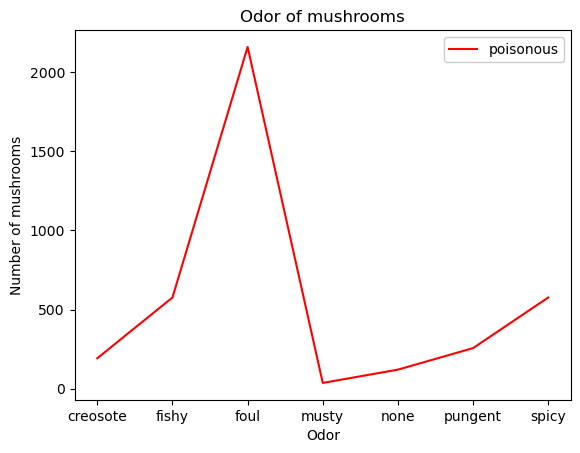

In [8]:
#Plot for odor
mushroom.loc[mushroom['odor'] == 'a', 'odor'] = 'almond'
mushroom.loc[mushroom['odor'] == 'l', 'odor'] = 'anise'
mushroom.loc[mushroom['odor'] == 'c', 'odor'] = 'creosote'
mushroom.loc[mushroom['odor'] == 'y', 'odor'] = 'fishy'
mushroom.loc[mushroom['odor'] == 'f', 'odor'] = 'foul'
mushroom.loc[mushroom['odor'] == 'm', 'odor'] = 'musty'
mushroom.loc[mushroom['odor'] == 'n', 'odor'] = 'none'
mushroom.loc[mushroom['odor'] == 'p', 'odor'] = 'pungent'
mushroom.loc[mushroom['odor'] == 's', 'odor'] = 'spicy'
p = mushroom[mushroom['class'] == 'p']
e = mushroom[mushroom['class'] == 'e']

ax1 = p.groupby('odor').size().plot(color = 'r', label = 'poisonous')
#ax2 = e.groupby('odor').size().plot(color = 'g', label = 'edible')
ax1.set_ylabel("Number of mushrooms")
ax1.set_xlabel("Odor")
ax1.set_title("Odor of mushrooms")
ax1.legend(loc=0,framealpha=1)

Before continuing with our analysis of the data, we need to make sure that we are not oversampling, which can be visualized using a bar chart. We want to make sure that we have a fairly even distribution of edible and poisonous mushrooms. If one group is over represented, then any models built using the data will not be accurate but will tend to classify samples as belonging to the dominant group. 

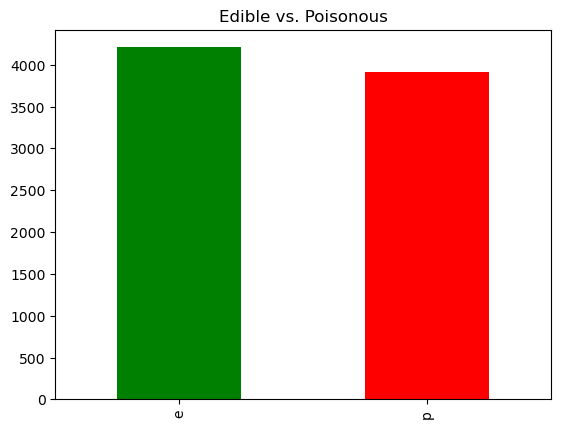

In [9]:
data["class"].value_counts().plot(kind="bar", color=["green", "red"], title="Edible vs. Poisonous");

Now that we know the data is evenly distributed, let's move on to classification. The most simple classification scheme we can come up with is to do no classification at all. The data shows that if we simply assume that every mushroom is poisonous, we will be correct about 48% of the time, which is not very accurate. However, this is useful because it serves as a reference to judge the effectiveness of our classifier.

In [10]:
(data['class']=='p').sum()/(data['class']).count()

0.48202855736090594

### Decision Trees
A better way to predict whether a mushroom is poisonous is to use a Decision Tree classifier, which is a popular method of creating and visualizing predictive models and algorithms. They are highly effective and relatively easy to understand. Here, the basic goal is to split a dataset into smaller and smaller segments until each segment consists of data from a single class.
There are two stages to prediction using a Decision Tree. The first stage is training, where the tree is built, tested, and optimized using a labelled training set. The second stage is testing, where the tee is used to predict an unknown outcome. For this dataset, where data belongs to a finite number of classes, it is called a classification tree.

### Node Class
Let's begin by creating a node class. A node is a fork in a branch of the tree, where we split a larger group into two or more smaller groups by posing an either-or scenario. A node can either be a decision node or a leaf node. The branches of a decision node will be further split into even smaller groups. A leaf node does not split into additional nodes because one of the stopping criteria have been reached. Usually, this means either there are no more attributes to split on, or we can say with some level of confidence that all the atoms in the group belong to the same class.


In [11]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf(self):
        return self.value is not None


### Decision Tree
Now that we have a node, let’s build an entire tree. Because of the tree’s simple structure, it’s one of the fastest ways to classify data and identify the most significant attributes. Our Decision Tree class accepts min_split, max_depth, and num_features as input parameters.
When creating a tree from this class, min_split will limit the size of the leaf nodes so that we don’t keep splitting if there are too few atoms in a branch. For classification problems like this, the number of attributes to be considered for the split is usually limited to the square root of the number of input features, which is the use of the num_features parameter. Finally, our tree uses pre-pruning to avoid overfitting the data. This is accomplished by use of the max_depth variable.


In [12]:
class DecisionTree:
    def __init__(self, min_split=2, max_depth=100, num_features=None):
        self.min_split=min_split
        self.max_depth=max_depth
        self.num_features=num_features
        self.root=None

    def fit(self, X, y):
        self.num_features = X.shape[1] if not self.num_features else min(X.shape[1],self.num_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_feats = X.shape
        num_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or num_samples<self.min_split or num_labels==1):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        indexs = np.random.choice(num_feats, self.num_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, indexs)

        # create child nodes
        left_index, right_index = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_index, :], y[left_index], depth+1)
        right = self._grow_tree(X[right_index, :], y[right_index], depth+1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, indexs):
        curr_gain = -1
        split_idx, split_threshold = None, None

        for index in indexs:
            X_column = X[:, index]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > curr_gain:
                    curr_gain = gain
                    split_idx = index
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_index, right_index = self._split(X_column, threshold)

        if len(left_index) == 0 or len(right_index) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        weight_left = len(left_index)/len(y)
        weight_right = len(right_index)/len(y)
        entropy_left = self._entropy(y[left_index])
        entropy_right = self._entropy(y[right_index])
        child_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain
    
    def _split(self, X_column, split_thresh):
        left_index = np.argwhere(X_column <= split_thresh).flatten()
        right_index = np.argwhere(X_column > split_thresh).flatten()
        return left_index, right_index
    
    def _entropy(self, y):
        ps = np.bincount(y) / len(y)
        return (-1 * np.sum([p * np.log(p) for p in ps if p>0]))

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return np.array([self.traverse(x, self.root) for x in X])

    def traverse(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.traverse(x, node.left)
        return self.traverse(x, node.right)

Now, let's see how our DecisionTree model performs.
\
Before we do that, we need to do some work to create training and test datasets. We will also define a method to measure accuracy and create a confusion matrix.
[Note on preprocessing: The data is marked with a "b" tag indicating that there is mixed data types in the column. The data in each column should be treated as strings, and is the reason for the first block of code.]

In [13]:
mush = pd.get_dummies(data=data, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True)


X = mush.drop('class_p', axis=1)
y = mush['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

In [14]:
%%time
clf = DecisionTree(max_depth = 10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = accuracy(y_test, predictions)
print(acc)

1.0
CPU times: total: 188 ms
Wall time: 194 ms


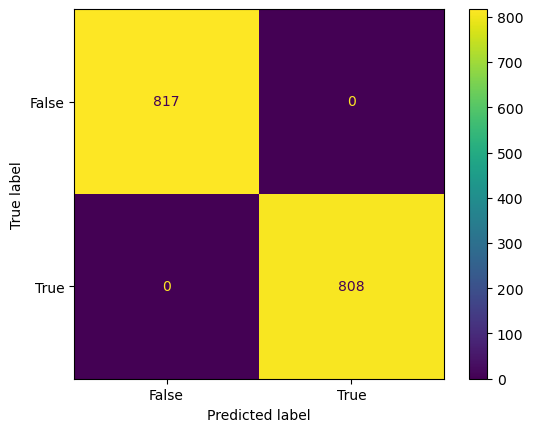

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
cm_display.plot()
plt.show()

In [21]:
print(classification_report(y_test,predictions))

So we get an accuracy of 100% in a couple of milliseconds. From the confusion matrix, our F-score is 1.Although that sounds good, let's take a moment to consider the downsides of Decsision Trees.
\
Decision trees can be limited in their effectiveness because of noisy data. They are not ideal for large datasets, and can disproportionately weigh some attributes. They are also liable to overfit the training data, which results in less accuracy.

### Random Forest
A better method is to use Random Forest, which is basically a collection of decision trees each fitted on a sample of the dataset. We can force the decision trees to be different by randomly selecting the samples each tree will be fitted on, limiting the features the algorithm will consider at each split in the tree. Random Forests average the classifications of the multiple trees, which creates a powerful classifier capable of handling large datasets.
Now that we understand what a Random Forest is, we can re-use some of our Decision Tree code to create a Random Forest class. In this model, we can adjust the number of trees, the depth of each tree, minimum atoms in a branch, and the number of features to consider. \
\
Now that we understand what a Random Forest is, we can re-use some of our Decision Tree code to create a Random Forest class. In this model, we can adjust the number of trees, the depth of each tree, minimum atoms in a branch, and the number of features to consider.


In [22]:
class RandomForest:
    def __init__(self, num_trees=10, max_depth=10, min_split=2, num_features=None):
        self.num_trees = num_trees
        self.max_depth=max_depth
        self.min_split=min_split
        self.num_features=num_features
        self.forest = []

    def fit(self, X, y):
        self.forest = []
        for _ in range(self.num_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_split=self.min_split,
                            num_features=self.num_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.forest.append(tree)

    def _bootstrap_samples(self, X, y):
        num_samples = X.shape[0]
        index = np.random.choice(num_samples, num_samples, replace=True)
        return X[index], y[index]
    
    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.forest])
        return np.array([self._most_common_label(p) for p in (np.swapaxes(predictions, 0, 1))])

Now, let's compare the performance of our Random Forest Classifier to our Decision Tree Classifier.

In [23]:
%%time
clf = RandomForest(num_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
cm_display.plot()
plt.show()

In [25]:
print(classification_report(y_test,predictions))

So the model takes much longer to run, as expected, and there is no change in either accuracy or F-score. That's okay though, because now we can be sure that we have avoided any of the potential problems we might have encountered using a single Decision Tree. Also, if you run the code multiple times, you will notice that the accuracy will change each time you run the code - that comes from the randomness involved in bootstrapping our test dataset. Sometimes the model is more accurate than other times, but it's accuracy never falls below that of a single tree.
Now that we have seen how our Random Forest performs, let's compare it to the models provided by sklearn.
First, let's look at the sklearn's Decision Tree.
\
[Note on preprocessing: For sklearn's Decision Tree, the data has been reloaded from the data frame. This is because as a side effect of removing the "b" flag for our models, the data labels have also been removed. The data labels will be displayed later, so I have added them back in here, but the data is otherwise unchanged.]

In [26]:
%%time
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=10,
                                  min_samples_split=2)


X = mush.drop('class_p', axis=1)
y = mush['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
cm_display.plot()
plt.show()

In [28]:
print(classification_report(y_test,predictions))

As we can see, our accuracy is still 100%, but the code is faster by an order of magnitude, finishing in milliseconds what took our code seconds. \
Now, let's look at sklearn's Random Forest

In [29]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 20,
                             criterion = 'entropy',
                             max_depth=10,
                             min_samples_split=2,
                             random_state=1234)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
cm_display.plot()
plt.show()

In [31]:
print(classification_report(y_test,predictions))

As expected, sklearn's Random Forest is significantly faster than our custom classifier, and the accuracy is still 100 percent. So although we can at least match sklearn's accuracy, we do not gain anything because our code is significantly slower.

However, there is one thing that sklearn's model does that ours cannot. Sklearn provides a method which allows us to see the attributes used by the DecisionTree. The result shows which attributes of the mushroom are most likely to indicate that it is poisonous.

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=10,
                                  min_samples_split=2)
clf = clf.fit(X, y)

# set the size of the figure - width, height
plt.figure(figsize=(18,10))
# semicolon supresses text output
tree.plot_tree(clf, fontsize=6, label='all', feature_names = X_train.columns);

Sklearn also allows us to display a Random Forest in a similar way by plotting each tree. However, this can be difficult to read. It may be better to quantify the importance of each variable using linear regression, since we are interested in the attributes themselves.
[Note: Although the regression equation considers all attributes, I have limited the output to those attributes whose coefficients are greater than 0.001.] 

In [33]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
importance = model.coef_
Feature_name = list(X.columns.values)

# summarize feature importance
for i,v in enumerate(importance):
    if v > 0.001:
        print(Feature_name[i],', Score: %.5f' % (v))

We have finished the task of classifying the mushroom dataset, which was the original intent of this project. However, this doesn't satisfactorily answer the question of how our models compare to sklearn's models. To address this question, let's consider another dataset - the digits dataset from sklearn.
\
First, let's look at our custom models.

In [34]:
data = datasets.load_digits()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [35]:
%%time
clf = DecisionTree(max_depth = 10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = accuracy(y_test, predictions)
print(acc)

In [36]:
%%time
clf = RandomForest(num_trees=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

In [37]:
print(classification_report(y_test,predictions))

As you can see, using a different dataset shows a significant difference in the accuracy between the DecisionTree and RandomForest models. There is also a significant time difference. Now let's look at sklearn's models.

In [38]:
%%time
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=100,
                                  min_samples_split=2)

clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

In [39]:
%%time
clf = RandomForestClassifier(n_estimators = 20,
                             criterion = 'entropy',
                             max_depth=10,
                             min_samples_split=2,
                             random_state=1234)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc =  accuracy(y_test, predictions)
print(acc)

In [40]:
print(classification_report(y_test,predictions))

### Conclusions
From this experiment, we can see that when using the mushroom dataset, our custom models are as accurate as sklearn's. However, when dealing with a larger dataset, we can see that not only are sklearn's models more accurate than ours, they are also significantly faster, as should be expected. \
In the second portion of this project, we can see that the Random Forests are more accurate than the DecisionTree. We did not observe a similar increase in accuracy for the mushroom dataset simply because there was no room for improvement.\
By way of personal observation, both of us understood going into this project that we weren't going to create a model superior to sklearn, however we are relatively satisfied with the results. Working on this project was a good way to learn more about the DecisionTree and Random Forest algorithms, and about classification in general.